In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('EV_two_wheeler.csv')

In [3]:
df.head()

,Brand,Model,Maximum Power kW,Maximum Power kW/h,Max Torque,Charging time,Top speed,Weight,Mileage
0,Black Tea,Bonfire X,8.0,3.6,115.0,4.0,95,86,100
1,Black Tea,Bonfire S,5.7,1.8,195.0,4.0,45,86,75
2,BMW,CE 04,30.7,8.9,61.0,4.2,120,230,130
3,Cake,Kalk Work,10.0,2.6,252.0,2.0,90,79,85
4,Cake,Kalk,10.0,2.6,252.0,2.0,90,79,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               78 non-null     object 
 1   Model               78 non-null     object 
 2   Maximum Power kW    78 non-null     float64
 3   Maximum Power kW/h  78 non-null     float64
 4   Max Torque          78 non-null     float64
 5   Charging time       78 non-null     float64
 6   Top speed           78 non-null     int64  
 7   Weight              78 non-null     int64  
 8   Mileage             78 non-null     int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.6+ KB


In [5]:
print(pd.isnull(df).sum())

Brand                 0
Model                 0
Maximum Power kW      0
Maximum Power kW/h    0
Max Torque            0
Charging time         0
Top speed             0
Weight                0
Mileage               0
dtype: int64


In [6]:
df = df.drop(columns = ['Model', 'Brand'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maximum Power kW    78 non-null     float64
 1   Maximum Power kW/h  78 non-null     float64
 2   Max Torque          78 non-null     float64
 3   Charging time       78 non-null     float64
 4   Top speed           78 non-null     int64  
 5   Weight              78 non-null     int64  
 6   Mileage             78 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [8]:
from sklearn.cluster import KMeans

1
2
3
4
5
6
7
8
9
10
11
12
13
14


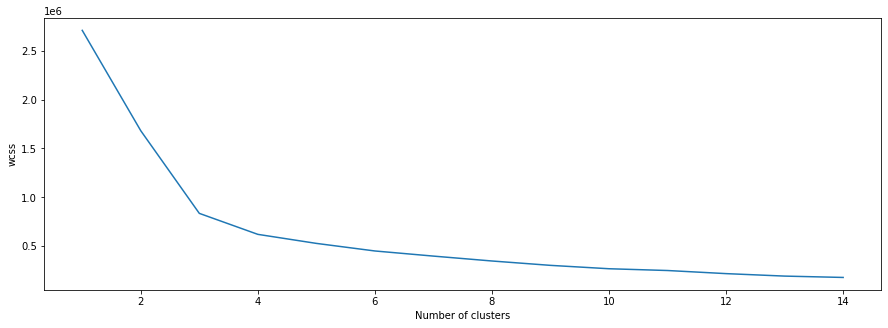

In [9]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
kmeans = KMeans(3, init = 'k-means++', random_state=42).fit(df)
df['cluster_number'] = kmeans.labels_

In [12]:
df

,Maximum Power kW,Maximum Power kW/h,Max Torque,Charging time,Top speed,Weight,Mileage,cluster_number
0,8.0,3.6,115.0,4.0,95,86,100,0
1,5.7,1.8,195.0,4.0,45,86,75,0
2,30.7,8.9,61.0,4.2,120,230,130,0
3,10.0,2.6,252.0,2.0,90,79,85,0
4,10.0,2.6,252.0,2.0,90,79,85,0
...,...,...,...,...,...,...,...,...
73,52.0,18.0,157.0,3.3,164,208,359,1
74,52.0,14.4,157.0,2.5,164,120,288,1
75,20.0,3.6,106.0,2.3,137,114,80,0
76,82.0,14.4,190.0,3.0,200,226,259,1


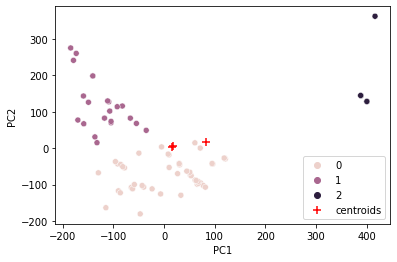

In [15]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = df.values
pca = preprocessing.scale(x)
pca = PCA(n_components=8)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(8)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

In [29]:
df['cluster_number'].value_counts()

0    51
1    22
2     5
Name: cluster_number, dtype: int64

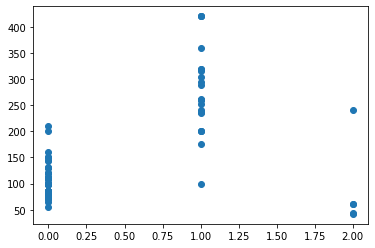

In [24]:
plt.scatter(df['cluster_number'], df['Mileage'])
plt.show()

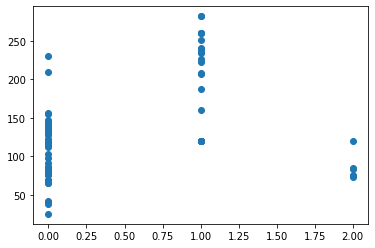

In [25]:
plt.scatter(df['cluster_number'], df['Weight'])
plt.show()

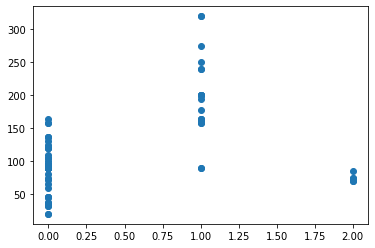

In [26]:
plt.scatter(df['cluster_number'], df['Top speed'])
plt.show()

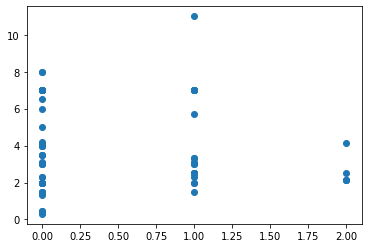

In [27]:
plt.scatter(df['cluster_number'], df['Charging time'])
plt.show()

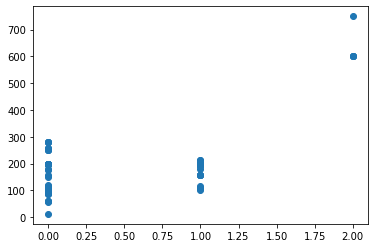

In [28]:
plt.scatter(df['cluster_number'], df['Max Torque'])
plt.show()

Inferences:
1. The highest mileage of a 2 wheeler is 400+ km for each charge, however most of the vehicles are in the range of 50-200 km per charge.
2. Most of the two wheelers weigh around 50-150 kg.
3. The top speed of a electric two wheeler is 300+ kmph, however most of the two wheelers are in the range of 20-150 kmph
4. The charging time of most of the two wheelers is less than 6 hrs per full charge.

Marketing Mix:
1. The mileage of the two wheeler must be above 200 km per charge
2. The weight must be less than 100 kg
3. The top speed must be more than 150 kmph
4. The charging time must be less than 4 hrs

The above factors will increase the sales of the products.